In [50]:
%pip install seaborn
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\azind\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Split data into a training and testing dataset
Due to the fact that the data is both already sorted by user and time, we will need to 'unsort' to gain a proper random sampling 

Steps 
    1) 'Unsort' and 'shuffle' data
    2) develop 2 files that are accurate random samplings of data 
    3) ensure files are random samplings of data

In [51]:
# NOTE: If running this in a new environment, you may need to adjust the path to the CSV file.
# Since the file was uploaded directly, 'geophone-sensor-data.csv' might be enough.
# For this notebook, we retain the original path.
dataset = pd.read_csv("./geophone/geophone-sensor-data.csv")

dataset_sorted = dataset.sort_values(by=["name", "timestamp"], ascending=[True, True])

Text(0.5, 0.98, 'Distribution of Mean')

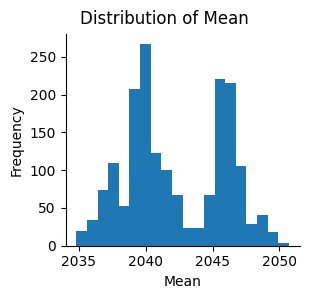

In [52]:
og = sns.FacetGrid(dataset_sorted)
og.map(plt.hist, 'mean', bins=20)

og.set_axis_labels("Mean", "Frequency")
og.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
og.figure.suptitle("Distribution of Mean")

In [53]:
train, test = train_test_split(dataset_sorted, test_size=0.5, random_state=42, shuffle=True)
print(train.head())
print('_'*40)
print(test.head())

     timestamp         mean   top_3_mean   min   max   std_dev  median  \
1710  21:12:44  2037.283333  2041.000000  2033  2041  1.858419  2038.0   
874   02:42:25  2039.936000  2071.333333  2007  2075  5.534851  2040.0   
1252  03:46:51  2042.155333  2048.000000  2037  2048  2.716715  2042.0   
1345  02:47:35  2041.374000  2047.000000  2035  2047  3.268964  2043.0   
873   02:42:22  2039.518667  2055.000000  2018  2055  3.941445  2041.0   

          q1      q3  skewness  dominant_freq        energy activity    name  
1710  2036.0  2039.0 -0.423633          600.0  1.930823e+09  waiting    Emir  
874   2035.0  2045.0 -0.127944          600.0  1.947087e+09  running  Furkan  
1252  2040.0  2045.0  0.110133          300.0  1.960641e+09  waiting   Yusuf  
1345  2039.0  2044.0 -0.585361          300.0  1.955860e+09  waiting    Enes  
873   2035.0  2042.0 -0.438889          300.0  1.944511e+09  running  Furkan  
________________________________________
     timestamp         mean   top_3_mean

Text(0.5, 0.98, 'Distribution of Training Mean')

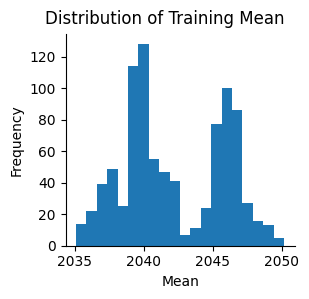

In [54]:
train_g = sns.FacetGrid(train)
train_g.map(plt.hist, 'mean', bins=20)
train_g.set_axis_labels("Mean", "Frequency")
train_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
train_g.figure.suptitle("Distribution of Training Mean")


Text(0.5, 0.98, 'Distribution of Test Mean')

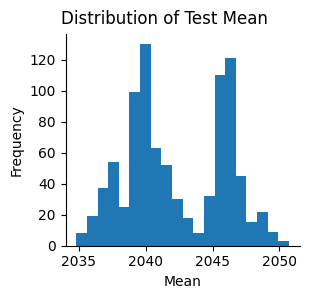

In [55]:
test_g = sns.FacetGrid(test)
test_g.map(plt.hist, 'mean', bins=20)

test_g.set_axis_labels("Mean", "Frequency")
test_g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
test_g.figure.suptitle("Distribution of Test Mean")


Cannot use person as a afeature due to below inconsistencies. We have to look at the data holistically. 

Test if there are outliers or noise in the data 

Binning and standardizing

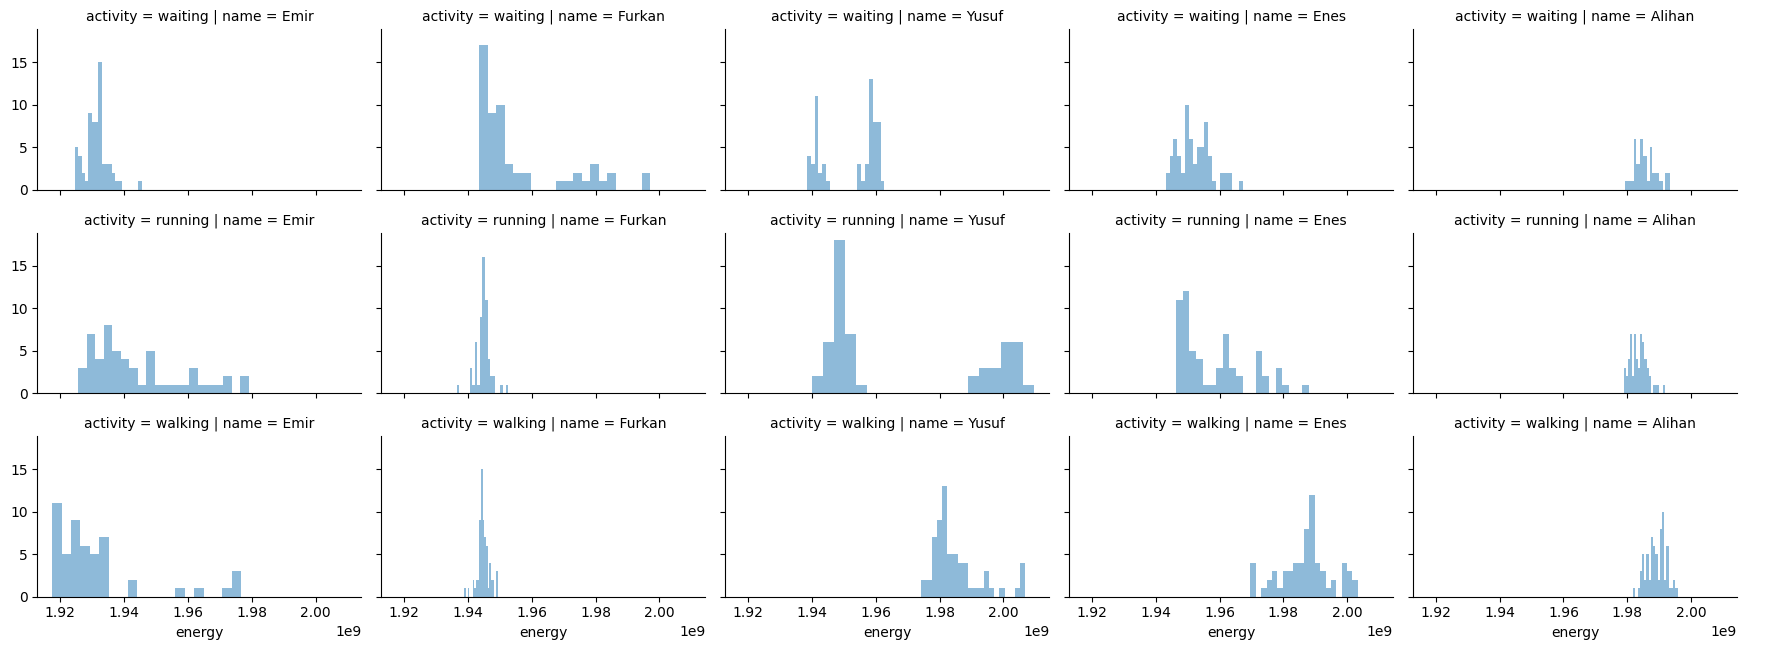

In [56]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.hist, 'energy', alpha=.5, bins=20)
grid.add_legend();


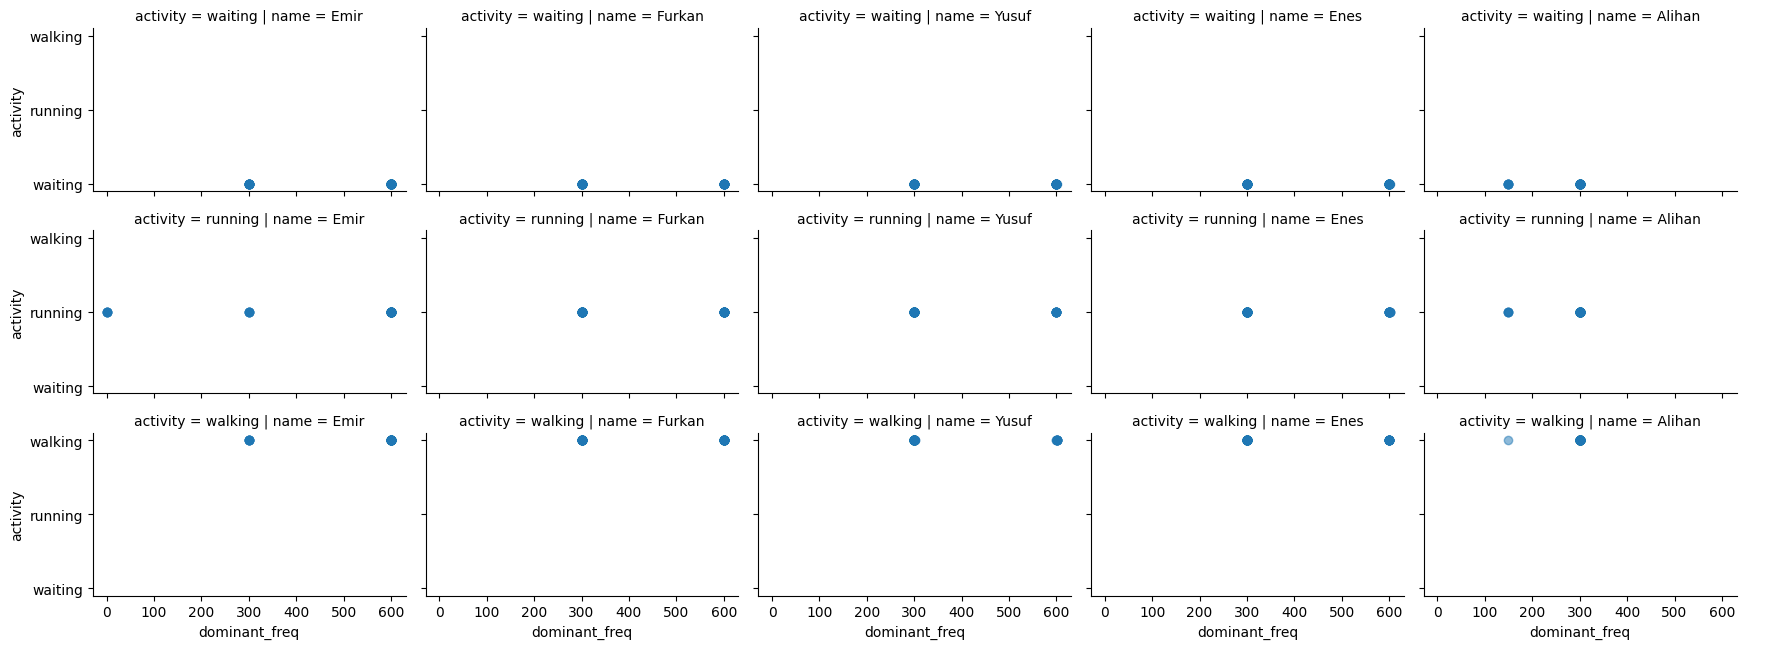

In [57]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'dominant_freq', 'activity', alpha=.5)
grid.add_legend();


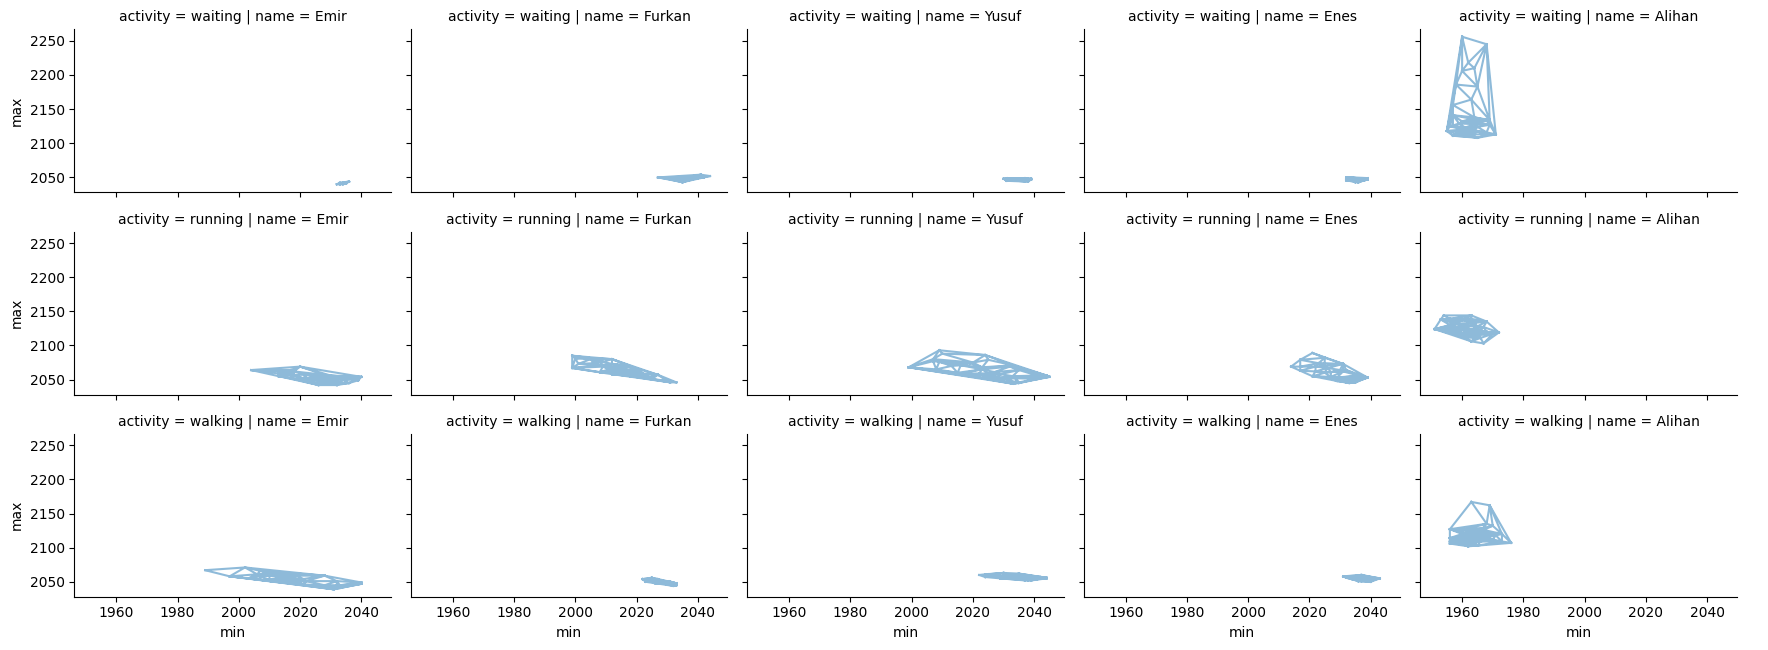

In [58]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.triplot, 'min', 'max', alpha=.5)
grid.add_legend();


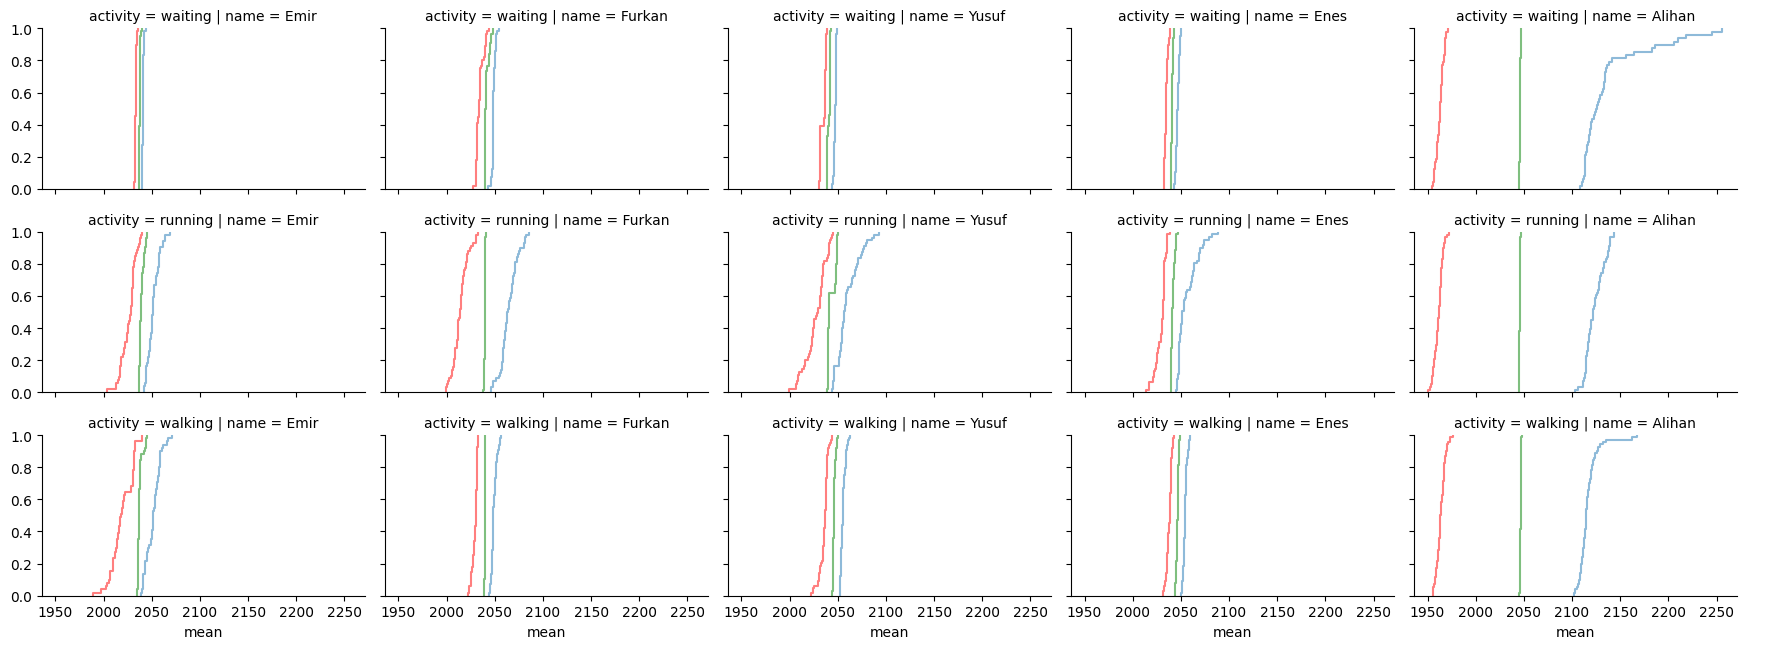

In [59]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.ecdf, 'max', alpha=.5)
grid.map(plt.ecdf, 'min', alpha=.5, color='red')
grid.map(plt.ecdf, 'mean', alpha=.5, color='green')
grid.add_legend();


C:\Users\azind\AppData\Local\Temp\ipykernel_58248\4119187136.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['timestamp'] = pd.to_datetime(train['timestamp'])


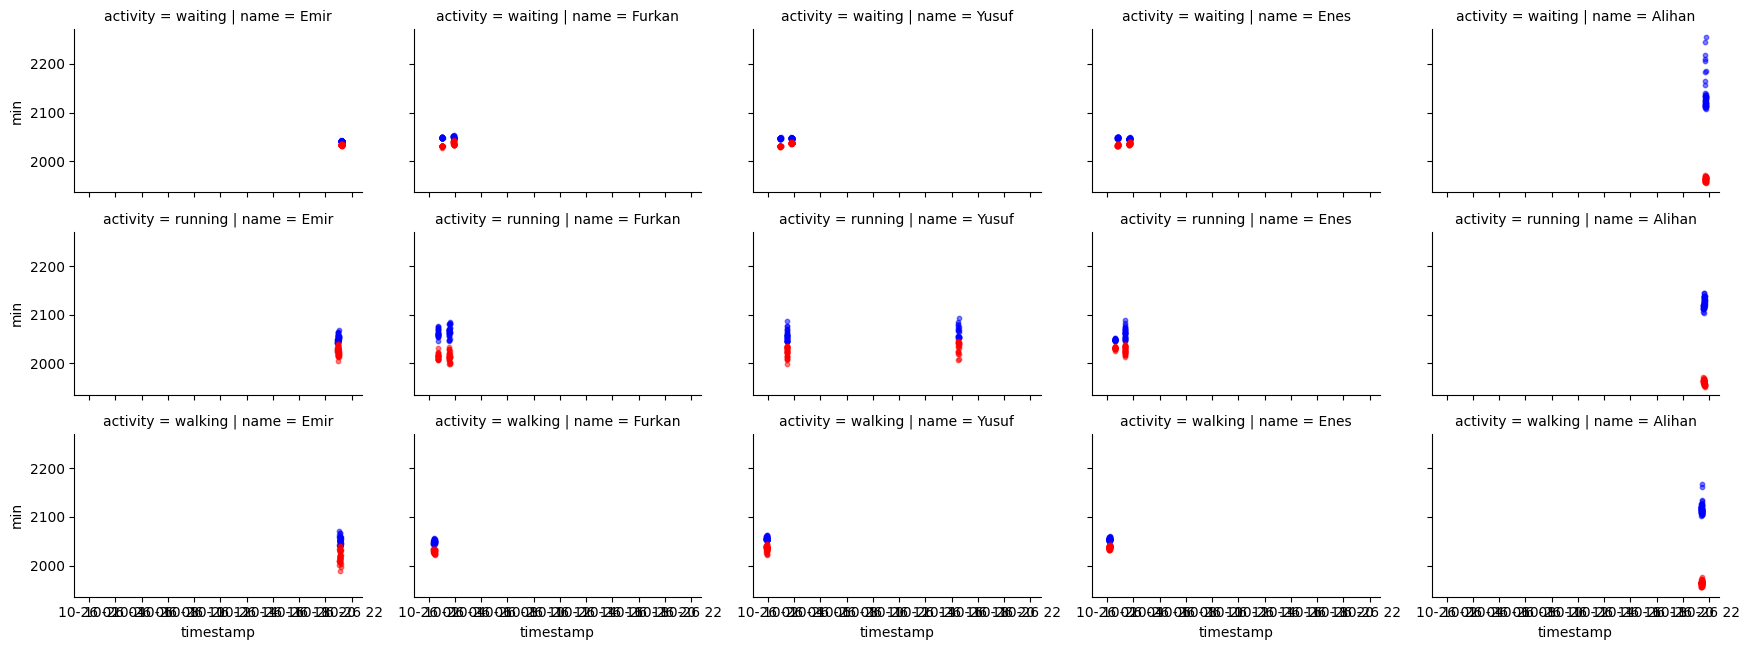

In [60]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'max', alpha=.5, color='blue', s=10)
grid.map(plt.scatter, 'timestamp', 'min', alpha=.5, color='red', s=10)
# grid.map(plt.plot('timestamp', max, label='Max Value', color='blue'))
# grid.map(plt.plot('timestamp', min, label='Min Value', color='red'))

# Add titles and labels for clarity
# plt.title('Max and Min Values Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.show()

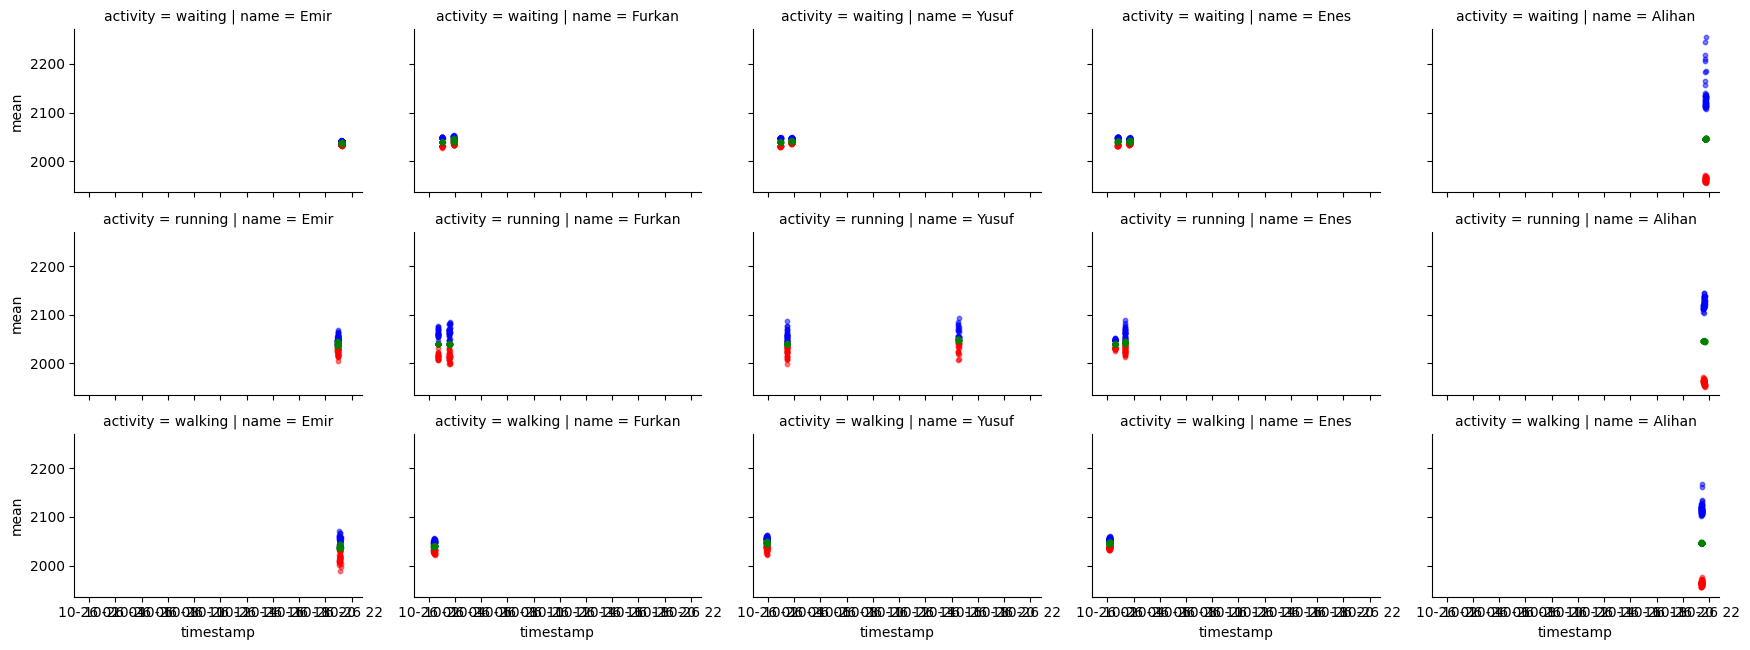

In [61]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'max', alpha=.5, color='blue', s=10)
grid.map(plt.scatter, 'timestamp', 'min', alpha=.5, color='red', s=10)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

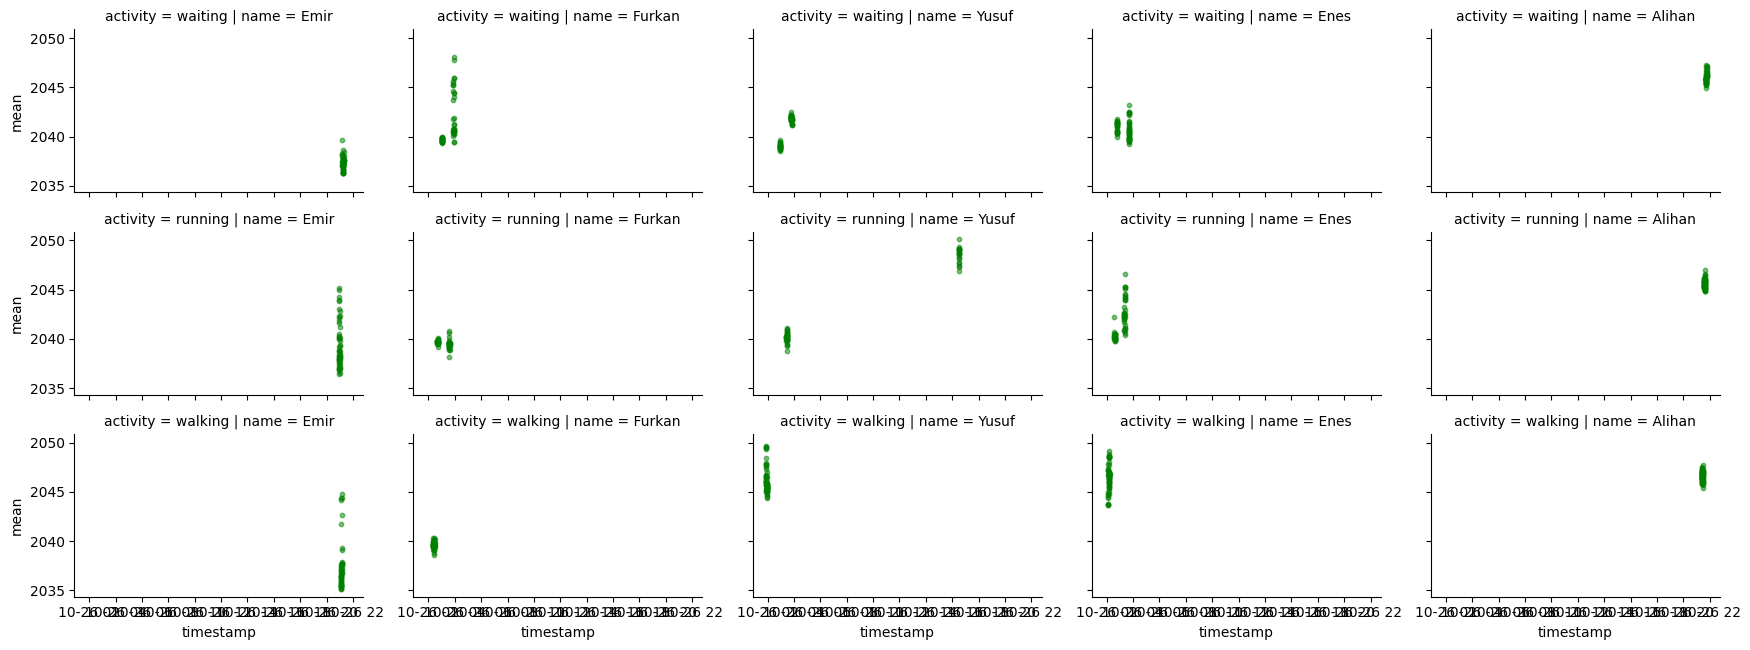

In [62]:
# Ensure the 'timestamp' column is a proper datetime object
train['timestamp'] = pd.to_datetime(train['timestamp'])
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='name', row='activity', height=2.2, aspect=1.6)
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

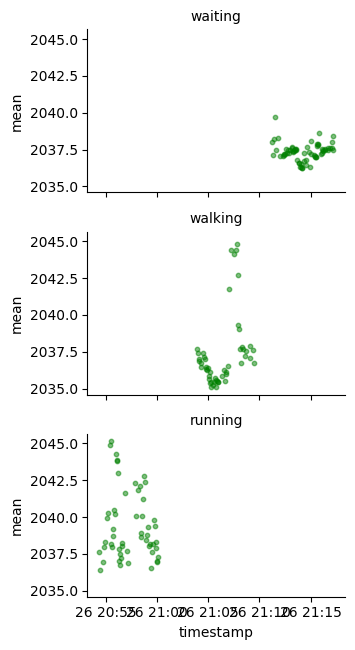

In [63]:
# 1. Ensure the 'timestamp' column is a proper datetime object (same as original)
train['timestamp'] = pd.to_datetime(train['timestamp'])

# 2. FILTER THE DATA FOR 'emir'
train_emir = train[train['name'] == 'Emir']

# 3. Create FacetGrid using the filtered data
# - Removed 'col='name'' because only 'emir' remains.
# - The row='activity' keeps the vertical separation by activity.
grid = sns.FacetGrid(train_emir, row='activity', height=2.2, aspect=1.6)

# 4. Map the scatter plot to the grid
grid.map(plt.scatter, 'timestamp', 'mean', alpha=.5, color='green', s=10)

# Optional: Add titles to the rows to show the 'activity'
grid.set_titles(row_template='{row_name}')
plt.show() # To display the plot, if not in a notebook environment

## 3. Machine Learning Model Training and Evaluation

We now prepare the data and train three classification models to meet the project requirements. The features used are the numerical summary statistics from the geophone sensor: `mean`, `top_3_mean`, `min`, `max`, `std_dev`, `median`, `q1`, `q3`, `skewness`, `dominant_freq`, and `energy`.

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Define features and encode the target variable
feature_cols = ['mean', 'top_3_mean', 'min', 'max', 'std_dev', 'median', 'q1', 'q3', 'skewness', 'dominant_freq', 'energy']

# Instantiate LabelEncoder
le = LabelEncoder()

# Apply encoding to the target variable 'activity'
y_train = le.fit_transform(train['activity'])
y_test = le.transform(test['activity'])

# Select features
X_train = train[feature_cols]
X_test = test[feature_cols]

print("X_train, X_test, y_train, y_test are prepared for modeling.")
print(f"Activities encoded: {list(zip(le.classes_, le.transform(le.classes_)))}")

X_train, X_test, y_train, y_test are prepared for modeling.
Activities encoded: [('running', np.int64(0)), ('waiting', np.int64(1)), ('walking', np.int64(2))]


### A. Decision Tree Classifier (Feature Relation and Split on Attributes)
This model helps identify the most **important features** used for classification by examining the Gini impurity/entropy reduction, which dictates how the tree **splits on attributes**.

In [65]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Feature Importance for 'Feature Relation' and 'Split on Attributes' focus
dt_feature_importance = pd.Series(dt_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nDecision Tree Feature Importances (Higher score means more crucial for splitting):\n", dt_feature_importance)

Decision Tree Accuracy: 0.7922

Decision Tree Classification Report:
               precision    recall  f1-score   support

     running       0.78      0.75      0.77       314
     waiting       0.81      0.81      0.81       302
     walking       0.78      0.81      0.80       284

    accuracy                           0.79       900
   macro avg       0.79      0.79      0.79       900
weighted avg       0.79      0.79      0.79       900


Decision Tree Feature Importances (Higher score means more crucial for splitting):
 std_dev          0.254854
max              0.193981
mean             0.128104
skewness         0.084457
q3               0.074128
min              0.070106
top_3_mean       0.056881
energy           0.051741
q1               0.051455
median           0.017596
dominant_freq    0.016696
dtype: float64


### B. Logistic Regression (Regression Tests)
Logistic Regression is utilized as a **regression test** (a simple linear classification baseline). A low performance here confirms that the activity detection requires a more complex, non-linear model.

In [66]:
# Logistic Regression is used as the 'regression test' model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))

Logistic Regression Accuracy: 0.3156

Logistic Regression Classification Report:
               precision    recall  f1-score   support

     running       0.00      0.00      0.00       314
     waiting       0.00      0.00      0.00       302
     walking       0.32      1.00      0.48       284

    accuracy                           0.32       900
   macro avg       0.11      0.33      0.16       900
weighted avg       0.10      0.32      0.15       900



C:\Users\azind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\azind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\azind\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

### C. Random Forest Classifier (Emphasis on Improvement and Different Feature Set)
To achieve a better result and demonstrate **improvement**, we train a Random Forest classifier using a **restricted and high-performing subset of features** (`dominant_freq`, `energy`, `std_dev`, `skewness`, `min`, `max`) as guided by the initial feature importance scores.

In [67]:
# Features for the new Random Forest model
rf_feature_cols_new = ['dominant_freq', 'energy', 'std_dev', 'skewness', 'min', 'max']

# Select the new feature subset
X_train_rf_new = X_train[rf_feature_cols_new]
X_test_rf_new = X_test[rf_feature_cols_new]

# Train Random Forest
rf_model_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_rf_new, y_train)
y_pred_rf_new = rf_model_new.predict(X_test_rf_new)

# Evaluate the new Random Forest
rf_new_accuracy = accuracy_score(y_test, y_pred_rf_new)
print(f"Random Forest (New Feature Set) Accuracy: {rf_new_accuracy:.4f}")
print("\nRandom Forest (New Feature Set) Classification Report:\n", classification_report(y_test, y_pred_rf_new, target_names=le.classes_))

# Final comparison for the presentation EMPHASIS
print(f"\nIMPROVEMENT: The new Random Forest model achieved {rf_new_accuracy:.4f} accuracy, which demonstrates a significant improvement over the Decision Tree's {dt_accuracy:.4f} baseline.")

Random Forest (New Feature Set) Accuracy: 0.8367

Random Forest (New Feature Set) Classification Report:
               precision    recall  f1-score   support

     running       0.83      0.82      0.82       314
     waiting       0.83      0.87      0.85       302
     walking       0.85      0.82      0.83       284

    accuracy                           0.84       900
   macro avg       0.84      0.84      0.84       900
weighted avg       0.84      0.84      0.84       900


IMPROVEMENT: The new Random Forest model achieved 0.8367 accuracy, which demonstrates a significant improvement over the Decision Tree's 0.7922 baseline.
